In [1]:
# Rede treinada no MNIST_FASHION treinada em umSel Organizing Map

In [1]:
###Bibliotecas da CNN

#Importa o Dataset do MNIST FASHION
from keras.datasets import fashion_mnist
#Importa o tipo de modelo Sequencial --> Camadas de neuronios em sequencia 
from keras.models import Sequential
#Camadas usadas na parte de MPL da rede
from keras.layers import Dense, Flatten, Dropout, Activation
#Camadas usadas na parte convolutiva da rede
from keras.layers import Conv2D, MaxPooling2D
#Função para transformar os labels em um vetor e plotar uma imagem do modelo criado
from keras.utils import to_categorical
#Modulo com os Optimizers da rede
import keras.optimizers
#Funções de custo
from keras import losses
#Pegar um valor inteiro aleatório
from random import randint
#Função para pegar o indice do valor máximo de um vetor
from numpy import argmax
#Para plotar as figuras
import matplotlib.pyplot as plt
#Para fazer o Data Augmanetation
from keras.preprocessing.image import ImageDataGenerator
#Funções gerais de um modelo
from keras import models
#Carrrega uma rede ja treinada
from keras.models import load_model
###Bibliotecas da SOM

#Self Organizing Map
from minisom import MiniSom

import matplotlib.pyplot as plt
import numpy as np
import pickle

Using TensorFlow backend.
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
##CRIAÇÂO E TREINAMENTO DA REDE

##DEFINIÇÃO DOS PARAMETROS DA REDE

#Parametros do treinamento da rede
batch_size = 100
epochs = 5
num_classes = 10

##CRIAÇÃO DAS VARIÁVEIS COM OS DATASETS DA REDE

#Salva nas variaveis os datasets de treino e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

#Define os nomes das classes (apenas para vizualização)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##TRATAMENTO DAS ENTRADAS PARA SE ADEQUAREM A REDE

#Transforma os labels em um vetor com as classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#Transforma as entradas em floats par que os calculos possam ser realizados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Regulariza as entradas para valores entre 0 e 1
x_train/=255
x_test/=255
#Redimensiona os Datasets para terem 4 dimensões necessárias para o Conv2D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

##CRIAÇÃO DA REDE
model = load_model('/home/gustavo/JUPITER-LAB/networks/CNN_77_FashionMNIST.h5')

'''
#Modelo sequencial
model = Sequential()
#Primeira camada convolutiva com 34 filtros 3x3 e input_shape de 28x28x1
model.add(Conv2D(40, (6, 6), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Segunda camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('sigmoid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout de 25%
model.add(Dropout(0.2))
#STerceira camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('relu'))
#Max Pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

#Parte MPL da rede
model.add(Flatten())

model.add(Dense(625))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(289))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
'''
#model.summary()

'''
##COMPILAÇÃO E TREINAMENTO DA REDE

#Define a função de otimização
optimizer = keras.optimizers.Adam(lr=0.001)
#Compila o modelo definindo a função de custo e o otimizador
model.compile(loss=losses.mean_squared_logarithmic_error, optimizer=optimizer, metrics=['accuracy'])
#Treina a rede com os datasets
##model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
#Cria uma geredor de data que modifica os dados para melhorar o aprendizado
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)
#Modifica os dados de treino de acordo com as especificações do gerador
datagen.fit(x_train)
#Treina o modelo com os dados modificados
model.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)
'''

##AVALIANDO A REDE COM O DATASET DE TESTE
#score = model.evaluate(x_test, y_test, verbose=1)
#print("Test score: ", score[0])
#print("Test accuracy: ", score[1])

###FUNCOES E OPERACOES REFERENTES AO TRATAMENTO DOS DADOS ANTES DO SOM

#Imprime os nomes das camadas do modelo
j = 0
for i in model.layers:
    print(j, ' - ', i.name, ' - ', i.output_shape)
    j += 1

#Define um elemento com os outputs
layer_outputs = [layer.output for layer in model.layers[1:] ]
#Cria um modelo que retorna os outputs de cada camada dados os inputs do modelo
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

#Função que retorna o feature vector de uma determinada camada, dada uma imagem
def get_layer(model, image, layer_num):
    out = []
    layer_outputs = [layer.output for layer in model.layers[1:] ]
    # Extracts the outputs of the top 12 layers

    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    # Creates a model that will return these outputs, given the model input

    layer = activation_model.predict(image)
    layer = layer[layer_num]
    layer = layer.reshape(np.prod(np.shape(layer)))
    out.append(layer)
    return out

data = np.concatenate((x_train, x_test))
labels = np.concatenate((y_train, y_test))
data.shape

X TREINO:  (60000, 28, 28)
X TESTE:  (10000, 28, 28)
X TREINO:  (60000, 28, 28, 1)
X TESTE:  (10000, 28, 28, 1)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
0  -  conv2d_1  -  (None, 28, 28, 40)
1  -  activation_1  -  (None, 28, 28, 40)
2  -  conv2d_2  -  (None, 25, 25, 60)
3  -  activation_2  -  (None, 25, 25, 60)
4  -  max_pooling2d_1  -  (None, 12, 12, 60)
5  -  dropout_1  -  (None, 12, 12, 60)
6  -  conv2d_3  -  (None, 9, 9, 60)
7  -  activation_3  -  (None, 9, 9, 60)
8  -  max_pooling2d_2  -  (None, 4, 4, 60)
9  -  flatten_1  -  (None, 960)
10  -  dense_1  -  (None, 625)
11  -  activation_4  -  (None, 625)
12  -  dropout_2  -  (None, 625)
13  -  dense_2  -  (None, 289)
14  -  activation_5  -  (None, 289)
15  -  dropout_3  -  (None, 289)
16  -  dense_3  -  (None, 25)
17  -  activation_6  -  (Non

(70000, 28, 28, 1)

In [5]:
#'''
###CRIAÇÃO E TREINAMENTO DO SOM

#Cria um SOM com 'num_el' elementos  entrada e a saída um mapa de dim x dim
dim = 30
num_el = 8640
som = MiniSom(dim, dim, num_el, sigma=3, learning_rate=0.1)
print('OK')

#Passa os n primeiros elementos do dataset pela rede, pega o feature_vector de uma camada layer
n = 1000
layer = 4
cont = 0
for image in data[:n]:
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = get_layer(model, image, layer)
    som.train(image, 10)
    if cont%100 == 0:
        print(cont)
    cont+=1
#'''
#layer = 8
#with open('/home/gustavo/JUPITER-LAB/networks/som_30_10k_8_FashionMNIST.p', 'rb') as infile:
    #som = pickle.load(infile)
    
'''
import pickle
#Nome: som_'dimensao do mapa'_'numero de exemplos treinados'_'camada da qual veio a entrada'.p
# saving the som in the file som.p
#nome da som:
    #som_"Dataset de treino"_"Camada da CNN de origem"_"Dimensao do SOM"_"Numero de elementos de treino"_"Quantidade de vezes treinada em cada elemento"
with open('/home/gustavo/JUPITER-LAB/networks/som_FashionMNIST_4_30_1000_10.p', 'wb') as outfile:
    pickle.dump(som, outfile)
    
'''   

#model.save('CNN_77.h5')

OK
0
100
200
300
400
500
600
700
800
900


'\nimport pickle\n#Nome: som_\'dimensao do mapa\'_\'numero de exemplos treinados\'_\'camada da qual veio a entrada\'.p\n# saving the som in the file som.p\n#nome da som:\n    #som_"Dataset de treino"_"Camada da CNN de origem"_"Dimensao do SOM"_"Numero de elementos de treino"_"Quantidade de vezes treinada em cada elemento"\nwith open(\'/home/gustavo/JUPITER-LAB/networks/som_FashionMNIST_4_30_1000_10.p\', \'wb\') as outfile:\n    pickle.dump(som, outfile)\n    \n'

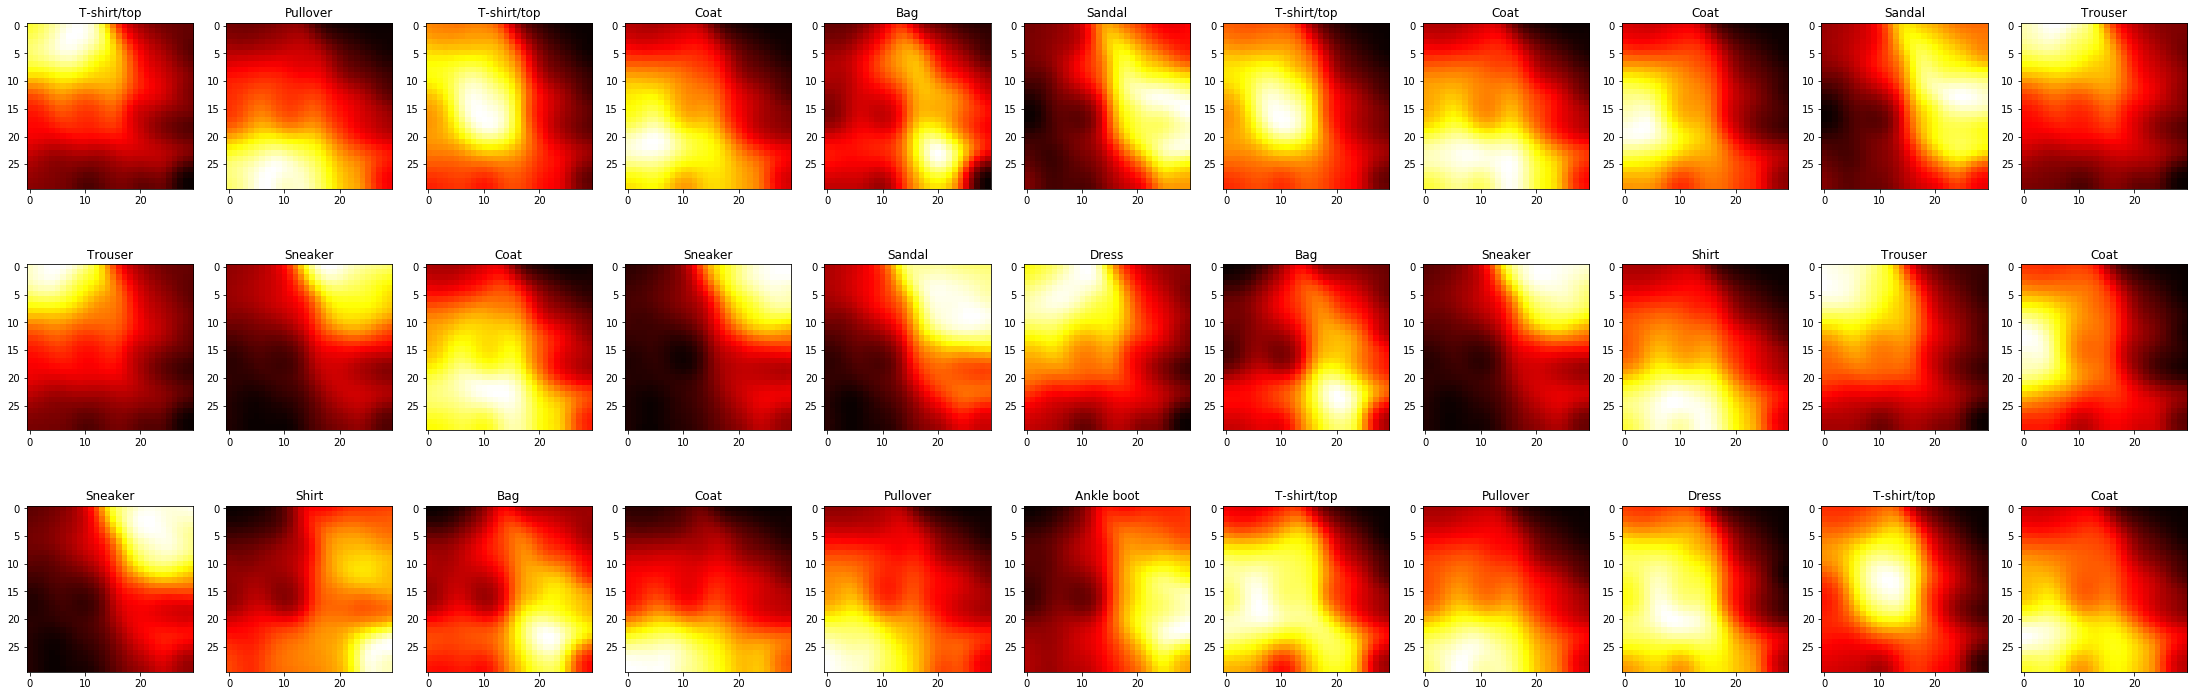

In [6]:

import random
j=1
for i in range(33):
    n = random.randint(50000, 60000)
    teste = data[n].reshape(1, data.shape[1], data.shape[2], data.shape[3])
    teste = som.activate(get_layer(model, teste, layer))
    teste = 1-teste;
    plt.subplot(len(teste), 11, j)
    plt.imshow(teste, cmap='hot')
    label = class_names[argmax(labels[n])]
    j+=1
    plt.title(label)
plt.subplots_adjust(left=0, bottom=0, right=5, top=25, wspace=0.2, hspace=0.2)
plt.show()
    